**Disclaimer.**
This colab is based on

1. [Introduction to deep learning](https://github.com/rasbt/stat453-deep-learning-ss21)
2. [Deep learning from scratch](https://github.com/WegraLee/deep-learning-from-scratch/tree/master/c)

In [ ]:
import numpy as np
import doctest
import matplotlib.pyplot as plt

## Basic gates

## Vectorization

In [ ]:
a = np.random.rand(1000000)
b = np.random.rand(1000000)

In [ ]:
def loop():
  c = 0
  for i in range(1000000):
    c += a[i] * b[i]
  return c

In [ ]:
%time loop()

CPU times: user 372 ms, sys: 0 ns, total: 372 ms
Wall time: 374 ms


250198.323955992

In [ ]:
def listcomp():
  return sum(a_i * b_i for a_i, b_i in zip(a, b))

In [ ]:
%time listcomp()

CPU times: user 563 ms, sys: 0 ns, total: 563 ms
Wall time: 577 ms


250198.323955992

In [ ]:
def vectorized():
  return np.dot(a, b)

In [ ]:
%time vectorized()

CPU times: user 2.33 ms, sys: 3.09 ms, total: 5.42 ms
Wall time: 6.12 ms


250198.32395599698

In [ ]:
import math

n = 10000
v = np.random.rand(n, 1)
u = np.zeros((n, 1))

for i in range(n):
  u[i] = math.exp(v[i])

u = np.exp(v)
u = np.log(v)
u = np.abs(v)
u = v ** 2

## MLP implementation

### Preparing a toy dataset

In [ ]:
##########################
### DATASET
##########################

import sklearn.datasets as dt
data = dt.make_classification(
  n_samples=100,
  n_features=2,
  n_repeated=0,
  n_classes=2,
  n_redundant=0)
X, y = data[0], data[1]
y = y.astype(int)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

Class label counts: [50 50]
X.shape: (100, 2)
y.shape: (100,)


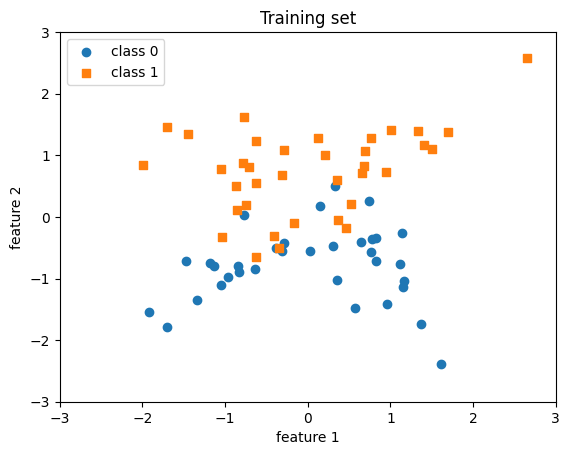

In [ ]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

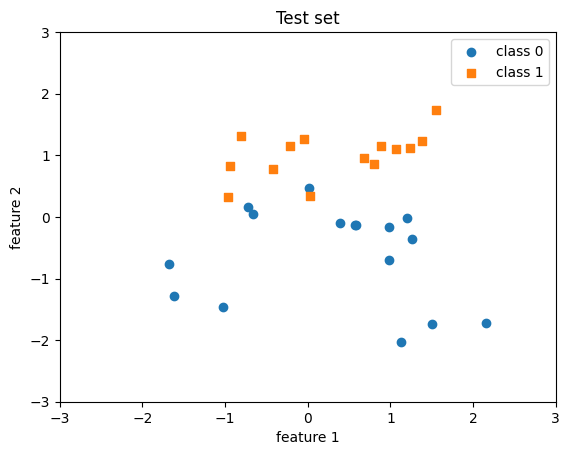

In [ ]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')
plt.title('Test set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

### Defining a perceptron model

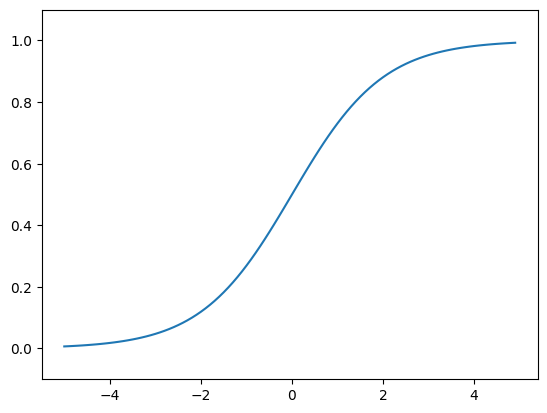

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

**'ppp' exercise**

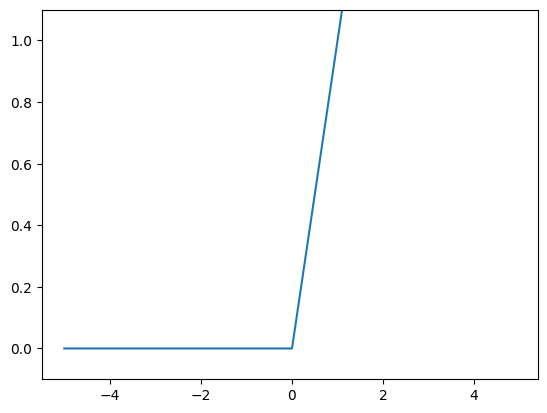

In [ ]:
def relu(x):
  return np.maximum(0, x)

X = np.arange(-5.0, 5.0, 0.1)
Y = relu(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

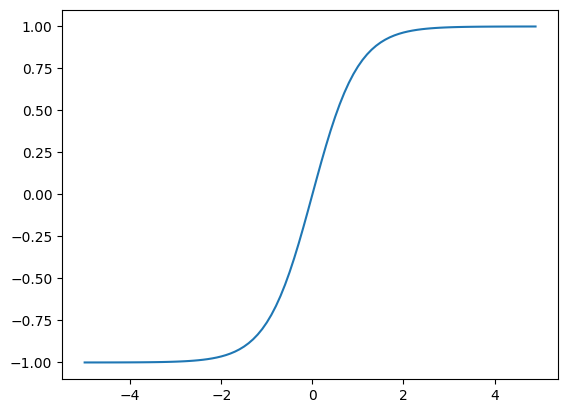

In [ ]:
def tanh(x):
  return (np.exp(x) -np.exp(-x))/ (np.exp(x)+ np.exp(-x))

X = np.arange(-5.0, 5.0, 0.1)
Y = tanh(X)
plt.plot(X, Y)
plt.ylim(-1.1, 1.1)
plt.show()

In [ ]:
class Perceptron():
  def __init__(self, num_features):
    self.num_features = num_features
    self.weights = np.zeros((num_features, 1), dtype=float)
    self.bias = np.zeros(1, dtype=float)

  def forward(self, x):
    linear = np.dot(x, self.weights) + self.bias  # comp. net input
    predictions = np.where(linear > 0., 1, 0)
    return predictions

  # 'ppp' exercise
  def backward(self, x, y):
    predictions = self.forward(x)
    errors = y-predictions
    return errors

  def train(self, x, y, epochs):
    for e in range(epochs):
      for i in range(y.shape[0]):
        errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
        self.weights += (errors * x[i]).reshape(self.num_features, 1)
        self.bias += errors

  def evaluate(self, x, y):
    predictions = self.forward(x).reshape(-1)
    accuracy = np.sum(predictions == y) / y.shape[0]
    return accuracy

### Training the model

In [ ]:
ppn = Perceptron(num_features=2)

ppn.train(X_train, y_train, epochs=5)

print('Model parameters:\n\n')
print('  Weights: %s\n' % ppn.weights)
print('  Bias: %s\n' % ppn.bias)

Model parameters:


  Weights: [[-0.09586889]
 [ 2.74678584]]

  Bias: [1.]



### Evaluating the model

In [ ]:
train_acc = ppn.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 90.00%


In [ ]:
test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 73.33%


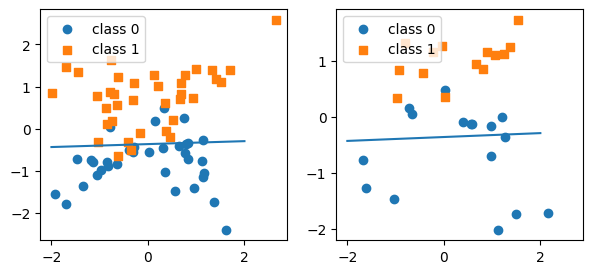

In [ ]:
##########################
### 2D Decision Boundary
##########################

w, b = ppn.weights, ppn.bias

x0_min = -2
x1_min = ((-(w[0] * x0_min) - b[0]) / w[1])

x0_max = 2
x1_max = ((-(w[0] * x0_max) - b[0]) / w[1])

# x0*w0 + x1*w1 + b = 0
# x1  = (-x0*w0 - b) / w1

# 'ppp' exercise
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7,3))

ax[0].plot([x0_min, x0_max],[x1_min, x1_max]) #x축은 x0_min부터 x0_max까지, y축은 x1_min부터 x1_max까지 표현한 직선을 긋는다.
ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
ax[0].legend(loc='upper left')

ax[1].plot([x0_min, x0_max],[x1_min, x1_max])
ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')
ax[1].legend(loc='upper left')

plt.show()
